# Coding Portion: Fashion Item Classification

* Dataset used: **Fashion MNIST** (28 x 28 grayscale images of fashion items)
* Dataset size: 60,000 training samples, 10,000 test samples
* Dataset source: https://github.com/zalandoresearch/fashion-mnist

#### Classification Labels:
Label | Description
:--- | ---
0 | T-shirt/top
1 | Trouser
2 | Pullover
3 | Dress
4 | Coat
5 | Sandal
6 | Shirt
7 | Sneaker
8 | Bag
9 | Ankle boot

### Step 1: Load in the Data

In [11]:
# Import Fashion-MNIST dataset from 'fashion' folder

from fashion import mnist_reader
X_train, y_train = mnist_reader.load_mnist('fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion', kind='t10k')

In [3]:
# Data exploration

print("Inputs shape is " + str(X_train.shape)) # 60,000 flattened image vectors (784 pixels long)
print("Input type is " + str(type(X_train)))
print("Labels:")
print(y_train)
print("Labels shape is" + str(y_train.shape)) # 60,000 labels
print("Labels type is " + str(type(y_train)))

Inputs shape is (60000, 784)
Input type is <class 'numpy.ndarray'>
Labels:
[9 0 0 ... 3 0 5]
Labels shape is(60000,)
Labels type is <class 'numpy.ndarray'>


In [4]:
# Convert numerical label to item description

def to_description(label):
    if label == 0: return "T-shirt/top"
    elif label == 1: return "Trouser"
    elif label == 2: return "Pullover"
    elif label == 3: return "Dress"
    elif label == 4: return "Coat"
    elif label == 5: return "Sandal"
    elif label == 6: return "Shirt"
    elif label == 7: return "Sneaker"
    elif label == 8: return "Bag"
    elif label == 9: return "Ankle boot"
    else: return "Label not found"

Label:  9
Description:  Ankle boot


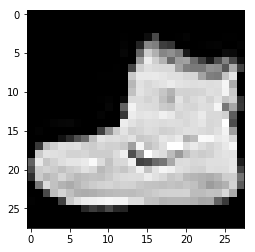

In [6]:
# Visualize the training examples

import matplotlib.pyplot as plt
import numpy as np

def visualize_sample(sample_num):
    flattened_vector = X_train[sample_num] # retrieve flattened vector
    image_2d = np.reshape(flattened_vector, (28, 28)) # reshape to 28 x 28 grayscale image array
    plt.imshow(image_2d, cmap = plt.get_cmap('gray')) # feed image into matplotlib
    print("Label: ", y_train[sample_num]) # print actual label
    print("Description: ", to_description(y_train[sample_num])) # print description
    plt.show()
    
    
visualize_sample(0)

### Step 2: Data Pre-Processing
1. Normalize the feature vectors/pixel values
2. Categorize the outputs

In [12]:
# Normalize the X_train and X_test dataset pixel values to between 0-1

# TODO: fill this in
    # Hint: maximum pixel value is still 255
X_train = X_train / 255.
X_test = X_test / 255.

In [15]:
import keras

# TODO: Use Keras to categorize the outputs ("one-hot" vectors)
    # Use variable names: y_train_categorical, y_test_categorical
    # hint: use the to_categorical() keras function to do this for you
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=10)

# let's see result of categorizing the outputs
print(y_test_categorical[:5])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


### Step 3: Create and Compile Neural Network Model

In [89]:
from keras.layers import Dense, Activation
from keras.models import Sequential

model = Sequential()

# TODO: fill this in
# Feel free to experiment with different number of layers, number of neurons, activation functions, etc.
    # Activation functions: https://keras.io/activations/
    # Declaring Keras layers: https://keras.io/layers/core/
    
### Add 1st layer here. Remember that the input_dimension should match up with the input vector dimension!
model.add(Dense(30, input_dim = 784))
model.add(Activation('relu'))

model.add(Dense(50))
model.add(Activation('relu'))

model.add(Dense(30))
model.add(Activation('relu'))
### Add 2nd layer here.
model.add(Dense(10))
model.add(Activation('softmax'))
# Add final layer here. Make sure the last layer matches up the output vector dimension
    # Hint: use softmax again to output classification probabilities


In [90]:
# TODO: Compile model
    # Loss: categorical cross-entropy
    # Optimizer: stochastic gradient descent
        # Or: experiment with other optimizers? https://keras.io/optimizers/
    # Metrics: accuracy
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [91]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 30)                23550     
_________________________________________________________________
activation_51 (Activation)   (None, 30)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 50)                1550      
_________________________________________________________________
activation_52 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 30)                1530      
_________________________________________________________________
activation_53 (Activation)   (None, 30)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 10)                310       
__________

In [92]:
# Import relevant libraries
from keras_tqdm import TQDMNotebookCallback # TQDM: progress bars
from keras.callbacks import TensorBoard # Tensorboard: training plots
    
# Clear any existing Tensorboard logs
import shutil
shutil.rmtree('./logs', ignore_errors=True)

# Set up callback links to refer back to during training
tensorboard = TensorBoard()
callbacks_list = [TQDMNotebookCallback(), tensorboard]

In [93]:
# TODO: Fit model to training data
    # Reserve some fraction of training data as validation data
    # Pick number of epochs
    # Pick a batch_size
    # Pass in relevant callbacks_list from above
model.fit(X_train, y_train_categorical, epochs=20, batch_size=40, callbacks=callbacks_list, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples


Epoch 1/20


54000/54000 [==============================] - ETA: 5:59 - loss: 2.4176 - acc: 0.075 - ETA: 26s - loss: 2.2704 - acc: 0.135 - ETA: 15s - loss: 2.2394 - acc: 0.15 - ETA: 12s - loss: 2.2110 - acc: 0.17 - ETA: 10s - loss: 2.1889 - acc: 0.19 - ETA: 9s - loss: 2.1631 - acc: 0.2108 - ETA: 8s - loss: 2.1350 - acc: 0.231 - ETA: 7s - loss: 2.1128 - acc: 0.241 - ETA: 7s - loss: 2.0811 - acc: 0.258 - ETA: 6s - loss: 2.0472 - acc: 0.275 - ETA: 6s - loss: 2.0138 - acc: 0.292 - ETA: 6s - loss: 1.9805 - acc: 0.311 - ETA: 5s - loss: 1.9528 - acc: 0.326 - ETA: 5s - loss: 1.9259 - acc: 0.341 - ETA: 5s - loss: 1.8943 - acc: 0.357 - ETA: 5s - loss: 1.8635 - acc: 0.372 - ETA: 5s - loss: 1.8384 - acc: 0.384 - ETA: 5s - loss: 1.8164 - acc: 0.394 - ETA: 5s - loss: 1.7932 - acc: 0.406 - ETA: 5s - loss: 1.7706 - acc: 0.415 - ETA: 5s - loss: 1.7485 - acc: 0.425 - ETA: 5s - loss: 1.7292 - acc: 0.432 - ETA: 5s - loss: 1.7121 - acc: 0.439 - ETA: 5s - loss: 1.6924 - acc: 0.446 - ETA: 5s - loss: 1.6754 - acc: 0.452 -

54000/54000 [==============================] - ETA: 1:31 - loss: 0.6887 - acc: 0.750 - ETA: 17s - loss: 0.5605 - acc: 0.800 - ETA: 12s - loss: 0.5539 - acc: 0.80 - ETA: 11s - loss: 0.5731 - acc: 0.79 - ETA: 10s - loss: 0.5661 - acc: 0.80 - ETA: 10s - loss: 0.5591 - acc: 0.80 - ETA: 9s - loss: 0.5592 - acc: 0.8067 - ETA: 9s - loss: 0.5573 - acc: 0.807 - ETA: 8s - loss: 0.5655 - acc: 0.805 - ETA: 8s - loss: 0.5626 - acc: 0.807 - ETA: 8s - loss: 0.5661 - acc: 0.803 - ETA: 8s - loss: 0.5761 - acc: 0.799 - ETA: 8s - loss: 0.5755 - acc: 0.800 - ETA: 8s - loss: 0.5739 - acc: 0.798 - ETA: 8s - loss: 0.5665 - acc: 0.800 - ETA: 8s - loss: 0.5642 - acc: 0.801 - ETA: 7s - loss: 0.5629 - acc: 0.801 - ETA: 7s - loss: 0.5615 - acc: 0.802 - ETA: 7s - loss: 0.5606 - acc: 0.802 - ETA: 7s - loss: 0.5592 - acc: 0.803 - ETA: 7s - loss: 0.5598 - acc: 0.803 - ETA: 7s - loss: 0.5600 - acc: 0.802 - ETA: 7s - loss: 0.5626 - acc: 0.802 - ETA: 7s - loss: 0.5642 - acc: 0.800 - ETA: 7s - loss: 0.5639 - acc: 0.799 -

54000/54000 [==============================] - ETA: 41s - loss: 0.4757 - acc: 0.80 - ETA: 4s - loss: 0.4753 - acc: 0.8352 - ETA: 4s - loss: 0.4791 - acc: 0.833 - ETA: 4s - loss: 0.4894 - acc: 0.830 - ETA: 4s - loss: 0.4877 - acc: 0.832 - ETA: 4s - loss: 0.4900 - acc: 0.833 - ETA: 4s - loss: 0.4883 - acc: 0.834 - ETA: 4s - loss: 0.4880 - acc: 0.832 - ETA: 4s - loss: 0.4888 - acc: 0.832 - ETA: 4s - loss: 0.4940 - acc: 0.829 - ETA: 5s - loss: 0.4905 - acc: 0.831 - ETA: 5s - loss: 0.4902 - acc: 0.830 - ETA: 5s - loss: 0.4885 - acc: 0.831 - ETA: 5s - loss: 0.4918 - acc: 0.830 - ETA: 5s - loss: 0.4905 - acc: 0.831 - ETA: 5s - loss: 0.4872 - acc: 0.831 - ETA: 5s - loss: 0.4877 - acc: 0.831 - ETA: 5s - loss: 0.4898 - acc: 0.830 - ETA: 5s - loss: 0.4895 - acc: 0.831 - ETA: 5s - loss: 0.4915 - acc: 0.830 - ETA: 5s - loss: 0.4917 - acc: 0.830 - ETA: 5s - loss: 0.4885 - acc: 0.830 - ETA: 5s - loss: 0.4889 - acc: 0.831 - ETA: 5s - loss: 0.4860 - acc: 0.832 - ETA: 5s - loss: 0.4853 - acc: 0.832 - ET

54000/54000 [==============================] - ETA: 1:27 - loss: 0.4569 - acc: 0.875 - ETA: 15s - loss: 0.5690 - acc: 0.797 - ETA: 11s - loss: 0.4622 - acc: 0.84 - ETA: 7s - loss: 0.4417 - acc: 0.8436 - ETA: 6s - loss: 0.4355 - acc: 0.843 - ETA: 6s - loss: 0.4444 - acc: 0.837 - ETA: 6s - loss: 0.4444 - acc: 0.836 - ETA: 7s - loss: 0.4467 - acc: 0.838 - ETA: 7s - loss: 0.4398 - acc: 0.842 - ETA: 7s - loss: 0.4441 - acc: 0.840 - ETA: 7s - loss: 0.4468 - acc: 0.842 - ETA: 7s - loss: 0.4502 - acc: 0.841 - ETA: 7s - loss: 0.4515 - acc: 0.840 - ETA: 7s - loss: 0.4516 - acc: 0.838 - ETA: 7s - loss: 0.4552 - acc: 0.836 - ETA: 7s - loss: 0.4579 - acc: 0.837 - ETA: 7s - loss: 0.4564 - acc: 0.836 - ETA: 7s - loss: 0.4568 - acc: 0.835 - ETA: 7s - loss: 0.4589 - acc: 0.834 - ETA: 7s - loss: 0.4573 - acc: 0.835 - ETA: 7s - loss: 0.4558 - acc: 0.834 - ETA: 7s - loss: 0.4540 - acc: 0.836 - ETA: 7s - loss: 0.4573 - acc: 0.835 - ETA: 7s - loss: 0.4550 - acc: 0.836 - ETA: 7s - loss: 0.4560 - acc: 0.836 -

54000/54000 [==============================] - ETA: 1:28 - loss: 0.4136 - acc: 0.875 - ETA: 17s - loss: 0.3986 - acc: 0.861 - ETA: 11s - loss: 0.4149 - acc: 0.85 - ETA: 10s - loss: 0.4143 - acc: 0.86 - ETA: 9s - loss: 0.4291 - acc: 0.8539 - ETA: 8s - loss: 0.4213 - acc: 0.855 - ETA: 8s - loss: 0.4286 - acc: 0.853 - ETA: 8s - loss: 0.4281 - acc: 0.852 - ETA: 8s - loss: 0.4214 - acc: 0.855 - ETA: 7s - loss: 0.4176 - acc: 0.856 - ETA: 7s - loss: 0.4225 - acc: 0.856 - ETA: 7s - loss: 0.4306 - acc: 0.853 - ETA: 7s - loss: 0.4311 - acc: 0.852 - ETA: 7s - loss: 0.4317 - acc: 0.853 - ETA: 7s - loss: 0.4320 - acc: 0.853 - ETA: 7s - loss: 0.4334 - acc: 0.851 - ETA: 7s - loss: 0.4342 - acc: 0.850 - ETA: 7s - loss: 0.4392 - acc: 0.848 - ETA: 7s - loss: 0.4381 - acc: 0.849 - ETA: 7s - loss: 0.4396 - acc: 0.848 - ETA: 7s - loss: 0.4434 - acc: 0.847 - ETA: 7s - loss: 0.4444 - acc: 0.846 - ETA: 7s - loss: 0.4444 - acc: 0.846 - ETA: 7s - loss: 0.4465 - acc: 0.845 - ETA: 7s - loss: 0.4443 - acc: 0.845 -

54000/54000 [==============================] - ETA: 1:30 - loss: 0.2461 - acc: 0.925 - ETA: 16s - loss: 0.3512 - acc: 0.867 - ETA: 11s - loss: 0.3593 - acc: 0.87 - ETA: 10s - loss: 0.3901 - acc: 0.85 - ETA: 9s - loss: 0.4091 - acc: 0.8564 - ETA: 8s - loss: 0.4151 - acc: 0.858 - ETA: 8s - loss: 0.4104 - acc: 0.856 - ETA: 8s - loss: 0.4050 - acc: 0.859 - ETA: 8s - loss: 0.4187 - acc: 0.858 - ETA: 8s - loss: 0.4172 - acc: 0.856 - ETA: 7s - loss: 0.4166 - acc: 0.855 - ETA: 7s - loss: 0.4197 - acc: 0.853 - ETA: 7s - loss: 0.4120 - acc: 0.854 - ETA: 7s - loss: 0.4123 - acc: 0.855 - ETA: 7s - loss: 0.4073 - acc: 0.856 - ETA: 7s - loss: 0.4061 - acc: 0.857 - ETA: 7s - loss: 0.4115 - acc: 0.855 - ETA: 7s - loss: 0.4139 - acc: 0.854 - ETA: 6s - loss: 0.4151 - acc: 0.853 - ETA: 6s - loss: 0.4132 - acc: 0.854 - ETA: 6s - loss: 0.4100 - acc: 0.854 - ETA: 6s - loss: 0.4112 - acc: 0.854 - ETA: 6s - loss: 0.4126 - acc: 0.854 - ETA: 6s - loss: 0.4139 - acc: 0.853 - ETA: 6s - loss: 0.4129 - acc: 0.854 -

54000/54000 [==============================] - ETA: 1:27 - loss: 0.2861 - acc: 0.900 - ETA: 15s - loss: 0.3583 - acc: 0.872 - ETA: 11s - loss: 0.3710 - acc: 0.87 - ETA: 10s - loss: 0.3715 - acc: 0.86 - ETA: 9s - loss: 0.3591 - acc: 0.8712 - ETA: 8s - loss: 0.3747 - acc: 0.864 - ETA: 8s - loss: 0.3719 - acc: 0.866 - ETA: 8s - loss: 0.3774 - acc: 0.865 - ETA: 7s - loss: 0.3873 - acc: 0.862 - ETA: 7s - loss: 0.3899 - acc: 0.860 - ETA: 7s - loss: 0.3897 - acc: 0.860 - ETA: 7s - loss: 0.3949 - acc: 0.858 - ETA: 7s - loss: 0.4053 - acc: 0.856 - ETA: 7s - loss: 0.4055 - acc: 0.857 - ETA: 7s - loss: 0.4031 - acc: 0.858 - ETA: 7s - loss: 0.4052 - acc: 0.858 - ETA: 7s - loss: 0.4008 - acc: 0.860 - ETA: 6s - loss: 0.4019 - acc: 0.860 - ETA: 6s - loss: 0.4042 - acc: 0.859 - ETA: 6s - loss: 0.4016 - acc: 0.859 - ETA: 6s - loss: 0.4000 - acc: 0.859 - ETA: 6s - loss: 0.4042 - acc: 0.858 - ETA: 6s - loss: 0.4061 - acc: 0.857 - ETA: 6s - loss: 0.4089 - acc: 0.855 - ETA: 6s - loss: 0.4109 - acc: 0.854 -

54000/54000 [==============================] - ETA: 1:34 - loss: 0.3130 - acc: 0.900 - ETA: 16s - loss: 0.3608 - acc: 0.857 - ETA: 11s - loss: 0.3924 - acc: 0.85 - ETA: 10s - loss: 0.4037 - acc: 0.85 - ETA: 9s - loss: 0.3983 - acc: 0.8615 - ETA: 8s - loss: 0.4026 - acc: 0.863 - ETA: 8s - loss: 0.4058 - acc: 0.863 - ETA: 8s - loss: 0.4037 - acc: 0.863 - ETA: 8s - loss: 0.4023 - acc: 0.861 - ETA: 8s - loss: 0.3986 - acc: 0.859 - ETA: 8s - loss: 0.3995 - acc: 0.859 - ETA: 8s - loss: 0.3960 - acc: 0.862 - ETA: 7s - loss: 0.3980 - acc: 0.862 - ETA: 7s - loss: 0.4082 - acc: 0.859 - ETA: 7s - loss: 0.4058 - acc: 0.858 - ETA: 7s - loss: 0.4045 - acc: 0.858 - ETA: 7s - loss: 0.4014 - acc: 0.858 - ETA: 7s - loss: 0.4026 - acc: 0.858 - ETA: 7s - loss: 0.4034 - acc: 0.858 - ETA: 7s - loss: 0.4019 - acc: 0.858 - ETA: 7s - loss: 0.3983 - acc: 0.859 - ETA: 7s - loss: 0.3989 - acc: 0.859 - ETA: 7s - loss: 0.3981 - acc: 0.858 - ETA: 7s - loss: 0.4000 - acc: 0.858 - ETA: 7s - loss: 0.4004 - acc: 0.858 -

54000/54000 [==============================] - ETA: 1:19 - loss: 0.6192 - acc: 0.725 - ETA: 9s - loss: 0.4177 - acc: 0.8333  - ETA: 7s - loss: 0.4115 - acc: 0.845 - ETA: 6s - loss: 0.3991 - acc: 0.852 - ETA: 5s - loss: 0.3939 - acc: 0.859 - ETA: 5s - loss: 0.3914 - acc: 0.861 - ETA: 5s - loss: 0.3957 - acc: 0.858 - ETA: 5s - loss: 0.3940 - acc: 0.860 - ETA: 5s - loss: 0.3906 - acc: 0.860 - ETA: 5s - loss: 0.3891 - acc: 0.859 - ETA: 5s - loss: 0.3829 - acc: 0.862 - ETA: 5s - loss: 0.3808 - acc: 0.865 - ETA: 5s - loss: 0.3801 - acc: 0.865 - ETA: 5s - loss: 0.3774 - acc: 0.866 - ETA: 5s - loss: 0.3777 - acc: 0.867 - ETA: 5s - loss: 0.3793 - acc: 0.866 - ETA: 5s - loss: 0.3748 - acc: 0.867 - ETA: 5s - loss: 0.3766 - acc: 0.866 - ETA: 5s - loss: 0.3819 - acc: 0.866 - ETA: 5s - loss: 0.3833 - acc: 0.865 - ETA: 5s - loss: 0.3835 - acc: 0.866 - ETA: 5s - loss: 0.3819 - acc: 0.866 - ETA: 5s - loss: 0.3830 - acc: 0.866 - ETA: 5s - loss: 0.3816 - acc: 0.866 - ETA: 5s - loss: 0.3825 - acc: 0.866 -

54000/54000 [==============================] - ETA: 1:38 - loss: 0.2839 - acc: 0.950 - ETA: 16s - loss: 0.3515 - acc: 0.880 - ETA: 7s - loss: 0.3894 - acc: 0.8575 - ETA: 6s - loss: 0.3750 - acc: 0.866 - ETA: 6s - loss: 0.3709 - acc: 0.867 - ETA: 6s - loss: 0.3742 - acc: 0.867 - ETA: 5s - loss: 0.3765 - acc: 0.865 - ETA: 5s - loss: 0.3789 - acc: 0.864 - ETA: 5s - loss: 0.3786 - acc: 0.864 - ETA: 5s - loss: 0.3802 - acc: 0.863 - ETA: 5s - loss: 0.3844 - acc: 0.863 - ETA: 5s - loss: 0.3870 - acc: 0.862 - ETA: 5s - loss: 0.3847 - acc: 0.864 - ETA: 5s - loss: 0.3856 - acc: 0.863 - ETA: 5s - loss: 0.3826 - acc: 0.864 - ETA: 5s - loss: 0.3868 - acc: 0.863 - ETA: 5s - loss: 0.3892 - acc: 0.863 - ETA: 5s - loss: 0.3863 - acc: 0.864 - ETA: 5s - loss: 0.3842 - acc: 0.865 - ETA: 5s - loss: 0.3838 - acc: 0.865 - ETA: 5s - loss: 0.3829 - acc: 0.864 - ETA: 5s - loss: 0.3840 - acc: 0.863 - ETA: 5s - loss: 0.3789 - acc: 0.865 - ETA: 5s - loss: 0.3795 - acc: 0.864 - ETA: 5s - loss: 0.3780 - acc: 0.865 -

54000/54000 [==============================] - ETA: 1:38 - loss: 0.3281 - acc: 0.900 - ETA: 18s - loss: 0.3609 - acc: 0.877 - ETA: 13s - loss: 0.3718 - acc: 0.86 - ETA: 11s - loss: 0.4029 - acc: 0.85 - ETA: 10s - loss: 0.3821 - acc: 0.86 - ETA: 10s - loss: 0.3745 - acc: 0.86 - ETA: 9s - loss: 0.3731 - acc: 0.8644 - ETA: 9s - loss: 0.3711 - acc: 0.866 - ETA: 9s - loss: 0.3677 - acc: 0.870 - ETA: 9s - loss: 0.3700 - acc: 0.870 - ETA: 8s - loss: 0.3685 - acc: 0.870 - ETA: 8s - loss: 0.3736 - acc: 0.869 - ETA: 8s - loss: 0.3727 - acc: 0.867 - ETA: 8s - loss: 0.3731 - acc: 0.866 - ETA: 8s - loss: 0.3722 - acc: 0.866 - ETA: 8s - loss: 0.3716 - acc: 0.866 - ETA: 8s - loss: 0.3718 - acc: 0.865 - ETA: 8s - loss: 0.3678 - acc: 0.866 - ETA: 8s - loss: 0.3690 - acc: 0.864 - ETA: 8s - loss: 0.3651 - acc: 0.867 - ETA: 7s - loss: 0.3664 - acc: 0.866 - ETA: 7s - loss: 0.3629 - acc: 0.867 - ETA: 7s - loss: 0.3614 - acc: 0.868 - ETA: 7s - loss: 0.3607 - acc: 0.868 - ETA: 7s - loss: 0.3599 - acc: 0.868 -

54000/54000 [==============================] - ETA: 1:34 - loss: 0.1900 - acc: 0.900 - ETA: 18s - loss: 0.3494 - acc: 0.855 - ETA: 12s - loss: 0.3408 - acc: 0.86 - ETA: 11s - loss: 0.3374 - acc: 0.87 - ETA: 10s - loss: 0.3318 - acc: 0.87 - ETA: 9s - loss: 0.3398 - acc: 0.8779 - ETA: 9s - loss: 0.3467 - acc: 0.877 - ETA: 9s - loss: 0.3491 - acc: 0.875 - ETA: 9s - loss: 0.3620 - acc: 0.870 - ETA: 8s - loss: 0.3714 - acc: 0.867 - ETA: 8s - loss: 0.3708 - acc: 0.868 - ETA: 8s - loss: 0.3728 - acc: 0.867 - ETA: 8s - loss: 0.3719 - acc: 0.867 - ETA: 8s - loss: 0.3711 - acc: 0.867 - ETA: 8s - loss: 0.3690 - acc: 0.867 - ETA: 8s - loss: 0.3719 - acc: 0.866 - ETA: 7s - loss: 0.3682 - acc: 0.867 - ETA: 7s - loss: 0.3662 - acc: 0.868 - ETA: 7s - loss: 0.3657 - acc: 0.868 - ETA: 7s - loss: 0.3667 - acc: 0.868 - ETA: 7s - loss: 0.3644 - acc: 0.870 - ETA: 7s - loss: 0.3601 - acc: 0.871 - ETA: 7s - loss: 0.3618 - acc: 0.870 - ETA: 7s - loss: 0.3620 - acc: 0.870 - ETA: 7s - loss: 0.3598 - acc: 0.871 -

54000/54000 [==============================] - ETA: 1:38 - loss: 0.3198 - acc: 0.900 - ETA: 18s - loss: 0.3495 - acc: 0.886 - ETA: 13s - loss: 0.3342 - acc: 0.88 - ETA: 11s - loss: 0.3384 - acc: 0.88 - ETA: 10s - loss: 0.3458 - acc: 0.88 - ETA: 10s - loss: 0.3543 - acc: 0.88 - ETA: 9s - loss: 0.3627 - acc: 0.8745 - ETA: 9s - loss: 0.3712 - acc: 0.873 - ETA: 9s - loss: 0.3648 - acc: 0.874 - ETA: 8s - loss: 0.3669 - acc: 0.874 - ETA: 8s - loss: 0.3690 - acc: 0.872 - ETA: 8s - loss: 0.3640 - acc: 0.874 - ETA: 8s - loss: 0.3631 - acc: 0.873 - ETA: 8s - loss: 0.3651 - acc: 0.871 - ETA: 8s - loss: 0.3613 - acc: 0.872 - ETA: 8s - loss: 0.3603 - acc: 0.871 - ETA: 7s - loss: 0.3593 - acc: 0.873 - ETA: 7s - loss: 0.3621 - acc: 0.870 - ETA: 7s - loss: 0.3600 - acc: 0.871 - ETA: 7s - loss: 0.3605 - acc: 0.872 - ETA: 7s - loss: 0.3597 - acc: 0.871 - ETA: 7s - loss: 0.3584 - acc: 0.870 - ETA: 7s - loss: 0.3584 - acc: 0.869 - ETA: 7s - loss: 0.3585 - acc: 0.870 - ETA: 7s - loss: 0.3581 - acc: 0.869 -

54000/54000 [==============================] - ETA: 1:15 - loss: 0.2504 - acc: 0.875 - ETA: 9s - loss: 0.3264 - acc: 0.8767  - ETA: 7s - loss: 0.3294 - acc: 0.875 - ETA: 6s - loss: 0.3297 - acc: 0.876 - ETA: 6s - loss: 0.3204 - acc: 0.881 - ETA: 5s - loss: 0.3288 - acc: 0.882 - ETA: 5s - loss: 0.3226 - acc: 0.884 - ETA: 5s - loss: 0.3279 - acc: 0.882 - ETA: 5s - loss: 0.3224 - acc: 0.883 - ETA: 5s - loss: 0.3276 - acc: 0.883 - ETA: 5s - loss: 0.3328 - acc: 0.881 - ETA: 5s - loss: 0.3324 - acc: 0.881 - ETA: 5s - loss: 0.3349 - acc: 0.879 - ETA: 6s - loss: 0.3312 - acc: 0.881 - ETA: 6s - loss: 0.3314 - acc: 0.881 - ETA: 6s - loss: 0.3341 - acc: 0.879 - ETA: 6s - loss: 0.3347 - acc: 0.878 - ETA: 6s - loss: 0.3337 - acc: 0.878 - ETA: 6s - loss: 0.3361 - acc: 0.877 - ETA: 6s - loss: 0.3377 - acc: 0.876 - ETA: 6s - loss: 0.3398 - acc: 0.876 - ETA: 6s - loss: 0.3413 - acc: 0.876 - ETA: 6s - loss: 0.3409 - acc: 0.877 - ETA: 6s - loss: 0.3404 - acc: 0.877 - ETA: 5s - loss: 0.3393 - acc: 0.878 -

54000/54000 [==============================] - ETA: 1:18 - loss: 0.2052 - acc: 0.950 - ETA: 8s - loss: 0.3793 - acc: 0.8618  - ETA: 6s - loss: 0.3450 - acc: 0.882 - ETA: 6s - loss: 0.3381 - acc: 0.883 - ETA: 5s - loss: 0.3411 - acc: 0.882 - ETA: 5s - loss: 0.3438 - acc: 0.879 - ETA: 5s - loss: 0.3437 - acc: 0.877 - ETA: 5s - loss: 0.3405 - acc: 0.875 - ETA: 4s - loss: 0.3424 - acc: 0.874 - ETA: 4s - loss: 0.3428 - acc: 0.874 - ETA: 4s - loss: 0.3413 - acc: 0.875 - ETA: 4s - loss: 0.3457 - acc: 0.874 - ETA: 4s - loss: 0.3413 - acc: 0.876 - ETA: 4s - loss: 0.3409 - acc: 0.876 - ETA: 4s - loss: 0.3396 - acc: 0.877 - ETA: 4s - loss: 0.3380 - acc: 0.877 - ETA: 4s - loss: 0.3390 - acc: 0.877 - ETA: 4s - loss: 0.3386 - acc: 0.877 - ETA: 4s - loss: 0.3399 - acc: 0.877 - ETA: 4s - loss: 0.3394 - acc: 0.878 - ETA: 3s - loss: 0.3400 - acc: 0.877 - ETA: 3s - loss: 0.3416 - acc: 0.877 - ETA: 3s - loss: 0.3407 - acc: 0.877 - ETA: 3s - loss: 0.3405 - acc: 0.877 - ETA: 3s - loss: 0.3429 - acc: 0.876 -

54000/54000 [==============================] - ETA: 1:36 - loss: 0.2473 - acc: 0.850 - ETA: 18s - loss: 0.3838 - acc: 0.855 - ETA: 12s - loss: 0.3398 - acc: 0.87 - ETA: 11s - loss: 0.3468 - acc: 0.86 - ETA: 10s - loss: 0.3303 - acc: 0.87 - ETA: 10s - loss: 0.3328 - acc: 0.88 - ETA: 9s - loss: 0.3293 - acc: 0.8788 - ETA: 9s - loss: 0.3348 - acc: 0.877 - ETA: 8s - loss: 0.3413 - acc: 0.875 - ETA: 8s - loss: 0.3434 - acc: 0.876 - ETA: 8s - loss: 0.3451 - acc: 0.875 - ETA: 8s - loss: 0.3388 - acc: 0.877 - ETA: 8s - loss: 0.3426 - acc: 0.876 - ETA: 8s - loss: 0.3383 - acc: 0.878 - ETA: 8s - loss: 0.3328 - acc: 0.880 - ETA: 7s - loss: 0.3331 - acc: 0.880 - ETA: 7s - loss: 0.3311 - acc: 0.880 - ETA: 7s - loss: 0.3289 - acc: 0.882 - ETA: 7s - loss: 0.3287 - acc: 0.882 - ETA: 7s - loss: 0.3282 - acc: 0.882 - ETA: 7s - loss: 0.3281 - acc: 0.882 - ETA: 7s - loss: 0.3274 - acc: 0.882 - ETA: 7s - loss: 0.3263 - acc: 0.882 - ETA: 7s - loss: 0.3257 - acc: 0.882 - ETA: 7s - loss: 0.3253 - acc: 0.882 -

54000/54000 [==============================] - ETA: 1:26 - loss: 0.3405 - acc: 0.925 - ETA: 15s - loss: 0.4323 - acc: 0.852 - ETA: 12s - loss: 0.3882 - acc: 0.85 - ETA: 10s - loss: 0.3530 - acc: 0.87 - ETA: 9s - loss: 0.3745 - acc: 0.8723 - ETA: 9s - loss: 0.3621 - acc: 0.877 - ETA: 8s - loss: 0.3458 - acc: 0.880 - ETA: 8s - loss: 0.3440 - acc: 0.877 - ETA: 8s - loss: 0.3318 - acc: 0.882 - ETA: 8s - loss: 0.3345 - acc: 0.880 - ETA: 7s - loss: 0.3333 - acc: 0.880 - ETA: 7s - loss: 0.3318 - acc: 0.882 - ETA: 7s - loss: 0.3301 - acc: 0.881 - ETA: 7s - loss: 0.3265 - acc: 0.882 - ETA: 7s - loss: 0.3319 - acc: 0.881 - ETA: 7s - loss: 0.3295 - acc: 0.881 - ETA: 7s - loss: 0.3358 - acc: 0.879 - ETA: 7s - loss: 0.3324 - acc: 0.880 - ETA: 6s - loss: 0.3340 - acc: 0.879 - ETA: 6s - loss: 0.3283 - acc: 0.881 - ETA: 6s - loss: 0.3282 - acc: 0.881 - ETA: 6s - loss: 0.3283 - acc: 0.881 - ETA: 5s - loss: 0.3256 - acc: 0.883 - ETA: 5s - loss: 0.3256 - acc: 0.882 - ETA: 5s - loss: 0.3249 - acc: 0.882 -

54000/54000 [==============================] - ETA: 1:32 - loss: 0.5382 - acc: 0.800 - ETA: 18s - loss: 0.3747 - acc: 0.869 - ETA: 13s - loss: 0.3498 - acc: 0.86 - ETA: 11s - loss: 0.3246 - acc: 0.88 - ETA: 10s - loss: 0.3476 - acc: 0.87 - ETA: 10s - loss: 0.3434 - acc: 0.87 - ETA: 9s - loss: 0.3330 - acc: 0.8837 - ETA: 9s - loss: 0.3273 - acc: 0.882 - ETA: 8s - loss: 0.3274 - acc: 0.882 - ETA: 7s - loss: 0.3315 - acc: 0.882 - ETA: 6s - loss: 0.3366 - acc: 0.878 - ETA: 6s - loss: 0.3342 - acc: 0.879 - ETA: 6s - loss: 0.3334 - acc: 0.879 - ETA: 6s - loss: 0.3426 - acc: 0.876 - ETA: 5s - loss: 0.3371 - acc: 0.878 - ETA: 5s - loss: 0.3350 - acc: 0.879 - ETA: 5s - loss: 0.3343 - acc: 0.879 - ETA: 5s - loss: 0.3338 - acc: 0.880 - ETA: 5s - loss: 0.3304 - acc: 0.881 - ETA: 5s - loss: 0.3288 - acc: 0.881 - ETA: 5s - loss: 0.3274 - acc: 0.882 - ETA: 5s - loss: 0.3254 - acc: 0.883 - ETA: 5s - loss: 0.3252 - acc: 0.884 - ETA: 5s - loss: 0.3260 - acc: 0.883 - ETA: 5s - loss: 0.3264 - acc: 0.884 -

54000/54000 [==============================] - ETA: 1:25 - loss: 0.3787 - acc: 0.875 - ETA: 10s - loss: 0.3718 - acc: 0.873 - ETA: 7s - loss: 0.3151 - acc: 0.8858 - ETA: 6s - loss: 0.3334 - acc: 0.884 - ETA: 6s - loss: 0.3321 - acc: 0.886 - ETA: 5s - loss: 0.3335 - acc: 0.882 - ETA: 5s - loss: 0.3409 - acc: 0.879 - ETA: 5s - loss: 0.3402 - acc: 0.878 - ETA: 5s - loss: 0.3346 - acc: 0.879 - ETA: 5s - loss: 0.3311 - acc: 0.882 - ETA: 5s - loss: 0.3245 - acc: 0.884 - ETA: 5s - loss: 0.3276 - acc: 0.881 - ETA: 5s - loss: 0.3229 - acc: 0.884 - ETA: 5s - loss: 0.3206 - acc: 0.886 - ETA: 5s - loss: 0.3199 - acc: 0.886 - ETA: 5s - loss: 0.3191 - acc: 0.885 - ETA: 5s - loss: 0.3197 - acc: 0.884 - ETA: 5s - loss: 0.3214 - acc: 0.884 - ETA: 5s - loss: 0.3225 - acc: 0.883 - ETA: 5s - loss: 0.3214 - acc: 0.883 - ETA: 5s - loss: 0.3206 - acc: 0.884 - ETA: 5s - loss: 0.3223 - acc: 0.883 - ETA: 5s - loss: 0.3229 - acc: 0.883 - ETA: 5s - loss: 0.3227 - acc: 0.883 - ETA: 5s - loss: 0.3236 - acc: 0.883 -

54000/54000 [==============================] - ETA: 1:22 - loss: 0.3391 - acc: 0.925 - ETA: 10s - loss: 0.2929 - acc: 0.887 - ETA: 7s - loss: 0.3005 - acc: 0.8897 - ETA: 6s - loss: 0.2950 - acc: 0.893 - ETA: 5s - loss: 0.2869 - acc: 0.896 - ETA: 5s - loss: 0.2939 - acc: 0.896 - ETA: 5s - loss: 0.2986 - acc: 0.890 - ETA: 5s - loss: 0.3036 - acc: 0.887 - ETA: 5s - loss: 0.3028 - acc: 0.888 - ETA: 4s - loss: 0.3009 - acc: 0.888 - ETA: 4s - loss: 0.3016 - acc: 0.890 - ETA: 4s - loss: 0.2991 - acc: 0.890 - ETA: 4s - loss: 0.2978 - acc: 0.890 - ETA: 4s - loss: 0.3003 - acc: 0.889 - ETA: 4s - loss: 0.3030 - acc: 0.889 - ETA: 4s - loss: 0.3033 - acc: 0.890 - ETA: 4s - loss: 0.3043 - acc: 0.890 - ETA: 4s - loss: 0.3052 - acc: 0.889 - ETA: 4s - loss: 0.3055 - acc: 0.889 - ETA: 4s - loss: 0.3053 - acc: 0.889 - ETA: 4s - loss: 0.3045 - acc: 0.890 - ETA: 4s - loss: 0.3079 - acc: 0.889 - ETA: 4s - loss: 0.3081 - acc: 0.888 - ETA: 4s - loss: 0.3073 - acc: 0.889 - ETA: 4s - loss: 0.3071 - acc: 0.889 -

### Step 4: Evaluate the Model

In [94]:
# TODO: Evaluate model on test data

# Use model.evaluate()
# Also: open up the training logs in Tensorboard to check validation_loss for overfitting
loss_and_metrics = model.evaluate(X_test, y_test_categorical, batch_size=16)


print(loss_and_metrics)

10000/10000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 78us/step
[0.3766553090274334, 0.8659]


In [95]:
# Final predictions testing

import numpy as np

# Compare actual class to predicted class
def visualize_test_sample(test_sample_num):
    
    # Display actual image & label
    flattened_vector = X_test[test_sample_num] # retrieve flattened vector
    image_2d = np.reshape(flattened_vector, (28, 28)) # reshape to 28 x 28 grayscale image array
    plt.imshow(image_2d, cmap = plt.get_cmap('gray')) # feed image into matplotlib
    print("Actual Label: ", y_test[test_sample_num]) # print actual label
    print("Actual Description: ", to_description(y_test[test_sample_num])) # print description
    plt.show()
    
    # Print predicted label
    test_sample = np.expand_dims(X_test[test_sample_num], axis=0) # pick out a one-sample "batch" to feed into model
    predicted_scores = model.predict(test_sample) # outputted probabilities vector
    print("Outputted scores: ", predicted_scores) # print predicted scores

    predicted_class = np.argmax(predicted_scores) # pick the class with highest probability --> final prediction
    print("Predicted Label: ", predicted_class) # print predicted classification
    print("Predicted Description: ", to_description(predicted_class)) # print predicted label description

Actual Label:  7
Actual Description:  Sneaker


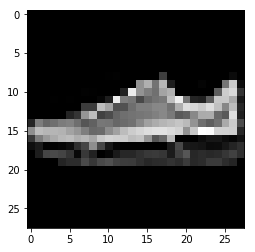

Outputted scores:  [[5.0423805e-05 6.0028210e-06 1.8725018e-06 4.7742874e-06 1.8724150e-07
  1.5529020e-02 1.6491977e-06 9.8281640e-01 1.2310767e-03 3.5867089e-04]]
Predicted Label:  7
Predicted Description:  Sneaker


In [97]:
visualize_test_sample(9
                     )